In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Reading Customers Dataset and performing EDA**

In [6]:
df_cust = pd.read_csv('/content/Customers.csv')
df_cust.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [7]:
df_cust.shape

(200, 4)

In [8]:
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [9]:
df_cust.describe()

,CustomerID,CustomerName,Region,SignupDate
count,200,200,200,200
unique,200,200,4,179
top,C0001,Lawrence Carroll,South America,2024-11-11
freq,1,1,59,3


In [10]:
df_cust.isnull().sum()

,0
CustomerID,0
CustomerName,0
Region,0
SignupDate,0


In [12]:
df_cust.nunique()

,0
CustomerID,200
CustomerName,200
Region,4
SignupDate,179


In [18]:
df_cust.drop(columns=['SignupDate_converted'], inplace=True)

In [25]:
df_cust

,CustomerID,CustomerName,Region,SignupDate,SignupMonth
0,C0001,Lawrence Carroll,South America,2022-07-10,7
1,C0002,Elizabeth Lutz,Asia,2022-02-13,2
2,C0003,Michael Rivera,South America,2024-03-07,3
3,C0004,Kathleen Rodriguez,South America,2022-10-09,10
4,C0005,Laura Weber,Asia,2022-08-15,8
...,...,...,...,...,...
195,C0196,Laura Watts,Europe,2022-06-07,6
196,C0197,Christina Harvey,Europe,2023-03-21,3
197,C0198,Rebecca Ray,Europe,2022-02-27,2
198,C0199,Andrea Jenkins,Europe,2022-12-03,12


**Visualizations**

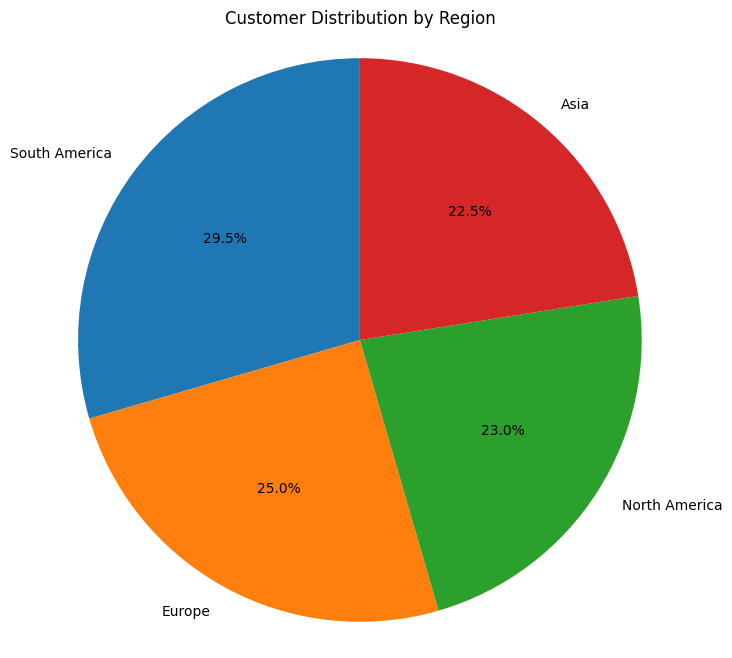

In [20]:
# customer distribution by region
region_counts = df_cust['Region'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Customer Distribution by Region')
plt.axis('equal')
plt.show()

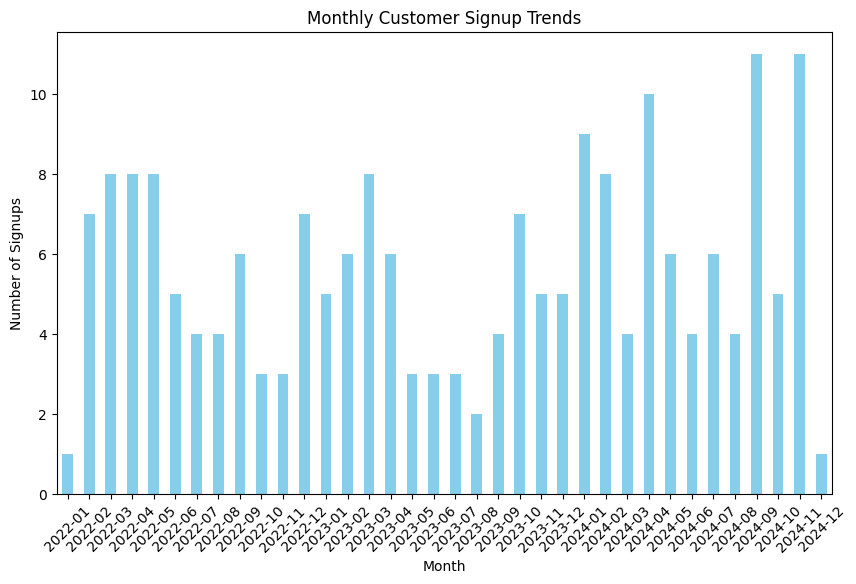

In [21]:
df_cust['SignupMonth'] = df_cust['SignupDate'].dt.to_period('M')
monthly_signups = df_cust['SignupMonth'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
monthly_signups.plot(kind='bar', color='skyblue')
plt.title('Monthly Customer Signup Trends')
plt.xlabel('Month')
plt.ylabel('Number of Signups')
plt.xticks(rotation=45)
plt.show()

**Reading Products Dataset and performing EDA**

In [26]:
df_prod = pd.read_csv('/content/Products.csv')
df_prod.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [27]:
df_prod.tail()

,ProductID,ProductName,Category,Price
95,P096,SoundWave Headphones,Electronics,307.47
96,P097,BookWorld Cookbook,Books,319.34
97,P098,SoundWave Laptop,Electronics,299.93
98,P099,SoundWave Mystery Book,Books,354.29
99,P100,HomeSense Sweater,Clothing,126.34


In [28]:
df_prod.shape

(100, 4)

In [29]:
df_prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


In [30]:
df_prod.describe()

,Price
count,100.000000
mean,267.551700
std,143.219383
min,16.080000
25%,147.767500
50%,292.875000
75%,397.090000
max,497.760000


In [31]:
df_prod.isnull().sum()

,0
ProductID,0
ProductName,0
Category,0
Price,0


In [32]:
df_prod.nunique()

,0
ProductID,100
ProductName,66
Category,4
Price,100


In [33]:
print(df_prod['ProductName'].unique())

['ActiveWear Biography' 'ActiveWear Smartwatch' 'ComfortLiving Biography'
 'BookWorld Rug' 'TechPro T-Shirt' 'ActiveWear Rug' 'SoundWave Cookbook'
 'BookWorld Bluetooth Speaker' 'BookWorld Wall Art'
 'ComfortLiving Smartwatch' 'SoundWave Desk Lamp'
 'ComfortLiving Headphones' 'BookWorld Smartwatch' 'ActiveWear Jacket'
 'HomeSense Headphones' 'ActiveWear Running Shoes' 'ActiveWear Textbook'
 'ComfortLiving Mystery Book' 'ComfortLiving Sweater' 'SoundWave Rug'
 'HomeSense Wall Art' 'ActiveWear Cookware Set'
 'SoundWave Bluetooth Speaker' 'SoundWave Headphones'
 'HomeSense Desk Lamp' 'TechPro Headphones' 'ActiveWear Cookbook'
 'BookWorld Cookbook' 'HomeSense T-Shirt' 'ActiveWear T-Shirt'
 'BookWorld Jacket' 'SoundWave Smartwatch' 'TechPro Vase'
 'TechPro Smartwatch' 'SoundWave Mystery Book' 'ComfortLiving Smartphone'
 'ActiveWear Headphones' 'SoundWave Novel' 'SoundWave T-Shirt'
 'BookWorld Sweater' 'ComfortLiving Cookware Set' 'TechPro Cookbook'
 'TechPro Textbook' 'ComfortLiving Desk La

In [35]:
category_counts = df_prod['Category'].value_counts()
category_counts

,count
Category,
Books,26
Electronics,26
Clothing,25
Home Decor,23


In [37]:
avg_price_per_category = df_prod.groupby('Category')['Price'].mean()
avg_price_per_category

,Price
Category,
Books,292.212308
Clothing,263.720000
Electronics,275.353462
Home Decor,235.020000


In [42]:
most_expensive_product = df_prod.loc[df_prod['Price'].idxmax()]
least_expensive_product = df_prod.loc[df_prod['Price'].idxmin()]
print("Most Expensive Product: ")
print(most_expensive_product)
print("Least Expensive Product: ")
print(least_expensive_product)


Most Expensive Product: 
ProductID                  P075
ProductName    TechPro Textbook
Category                  Books
Price                    497.76
Name: 74, dtype: object
Least Expensive Product: 
ProductID                      P056
ProductName    SoundWave Smartwatch
Category                Electronics
Price                         16.08
Name: 55, dtype: object


**Visualizations**

In [43]:
sns.set(style="whitegrid")

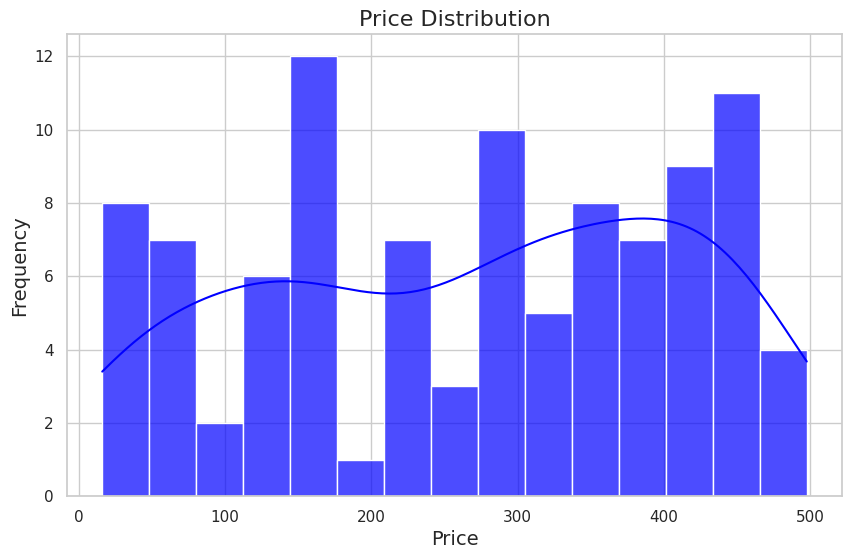

In [45]:
#Price Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_prod['Price'], kde=True, bins=15, color='blue', alpha=0.7)
plt.title('Price Distribution', fontsize=16)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

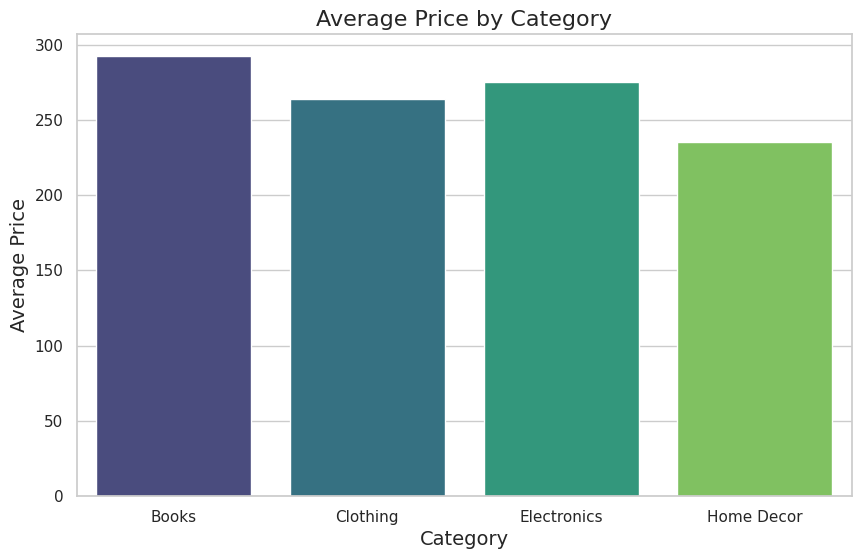

In [46]:
# Average price per category
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_price_per_category.index, y=avg_price_per_category.values, palette='viridis')
plt.title('Average Price by Category', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Average Price', fontsize=14)
plt.show()

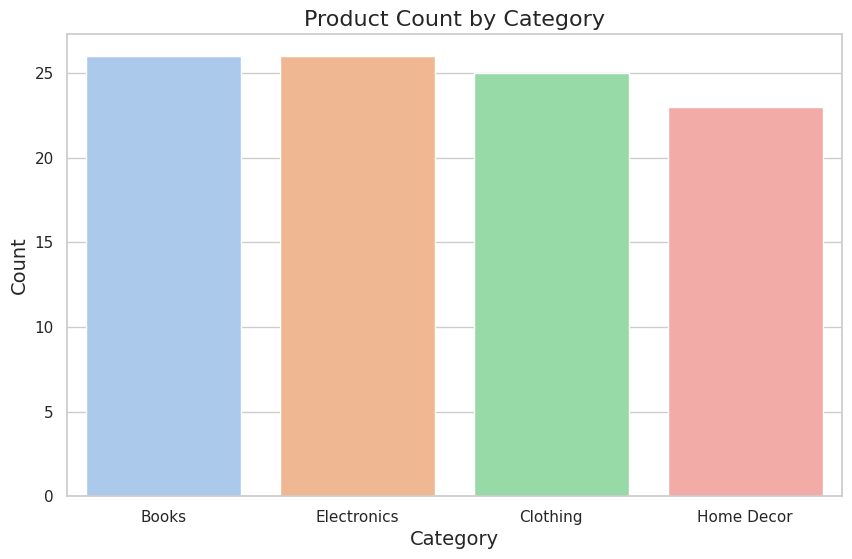

In [49]:
# Category distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df_prod, x='Category', palette='pastel', order=category_counts.index)
plt.title('Product Count by Category', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

**Reading Transactions Dataset and perfroming EDA**

In [50]:
df_trans = pd.read_csv('/content/Transactions.csv')
df_trans.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [51]:
df_trans.tail()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86
999,T00992,C0024,P037,2024-04-21 10:52:24,1,459.86,459.86


In [52]:
df_trans.shape

(1000, 7)

In [53]:
df_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


In [54]:
df_trans.describe()

,Quantity,TotalValue,Price
count,1000.000000,1000.000000,1000.00000
mean,2.537000,689.995560,272.55407
std,1.117981,493.144478,140.73639
min,1.000000,16.080000,16.08000
25%,2.000000,295.295000,147.95000
50%,3.000000,588.880000,299.93000
75%,4.000000,1011.660000,404.40000
max,4.000000,1991.040000,497.76000


In [55]:
df_trans.isnull().sum()

,0
TransactionID,0
CustomerID,0
ProductID,0
TransactionDate,0
Quantity,0
TotalValue,0
Price,0


In [56]:
df_trans.nunique()

,0
TransactionID,1000
CustomerID,199
ProductID,100
TransactionDate,1000
Quantity,4
TotalValue,369
Price,100


In [57]:
df_trans['TransactionDate'] = pd.to_datetime(df_trans['TransactionDate'])
df_trans


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68
...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86


In [60]:
df_trans['YearMonth'] = df_trans['TransactionDate'].dt.to_period('M')
df_trans['Weekday'] = df_trans['TransactionDate'].dt.day_name()

transactions_by_month = df_trans.groupby('YearMonth').size()
transactions_by_weekday = df_trans.groupby('Weekday').size()
print(transactions_by_month)
print(transactions_by_weekday)

YearMonth
2023-12      4
2024-01    107
2024-02     77
2024-03     80
2024-04     86
2024-05     86
2024-06     69
2024-07     96
2024-08     94
2024-09     96
2024-10     70
2024-11     57
2024-12     78
Freq: M, dtype: int64
Weekday
Friday       125
Monday       139
Saturday     126
Sunday       139
Thursday     150
Tuesday      163
Wednesday    158
dtype: int64


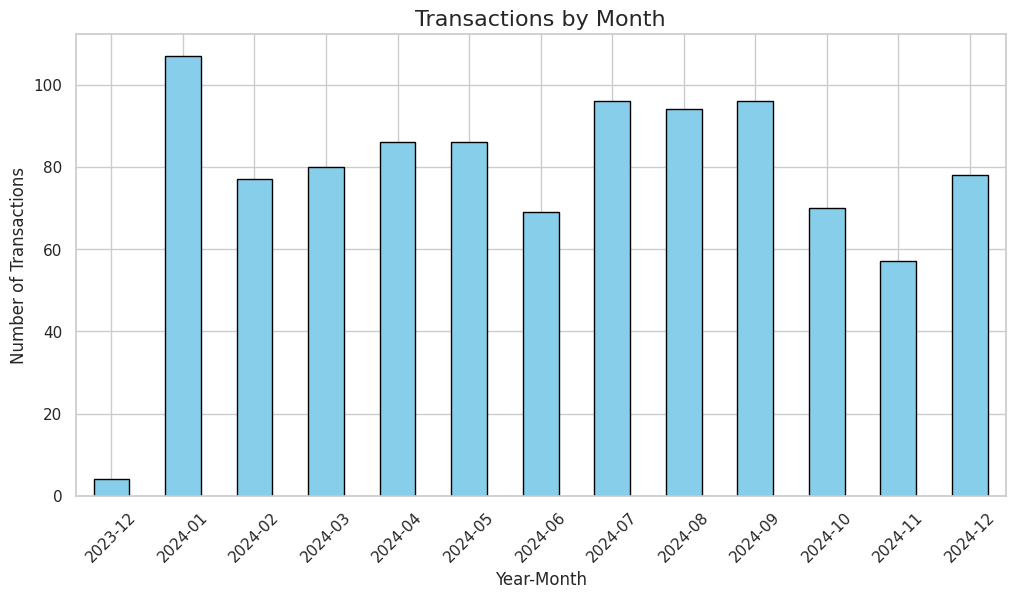

In [61]:
# transactions by month
plt.figure(figsize=(12, 6))
transactions_by_month.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Transactions by Month', fontsize=16)
plt.ylabel('Number of Transactions', fontsize=12)
plt.xlabel('Year-Month', fontsize=12)
plt.xticks(rotation=45)
plt.show()

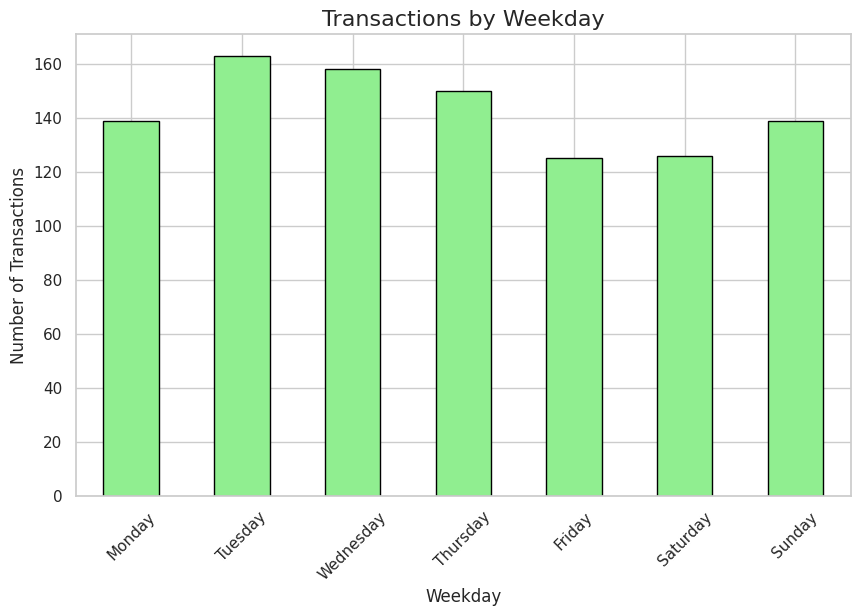

In [62]:
# transactions by weekday
plt.figure(figsize=(10, 6))
transactions_by_weekday = transactions_by_weekday.reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)
transactions_by_weekday.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Transactions by Weekday', fontsize=16)
plt.ylabel('Number of Transactions', fontsize=12)
plt.xlabel('Weekday', fontsize=12)
plt.xticks(rotation=45)
plt.show()

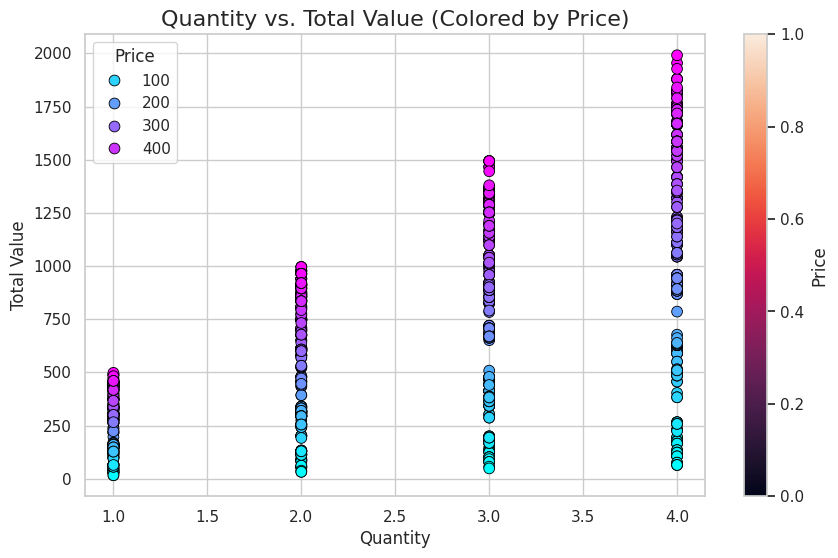

In [64]:
# Scatter plot: Quantity vs. TotalValue
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(data=df_trans, x='Quantity', y='TotalValue', hue='Price', palette='cool', s=60, edgecolor='black')
plt.title('Quantity vs. Total Value (Colored by Price)', fontsize=16)
plt.xlabel('Quantity', fontsize=12)
plt.ylabel('Total Value', fontsize=12)
# scatterplot variable to create the colorbar
plt.colorbar(scatter.collections[0], label='Price')
plt.show()

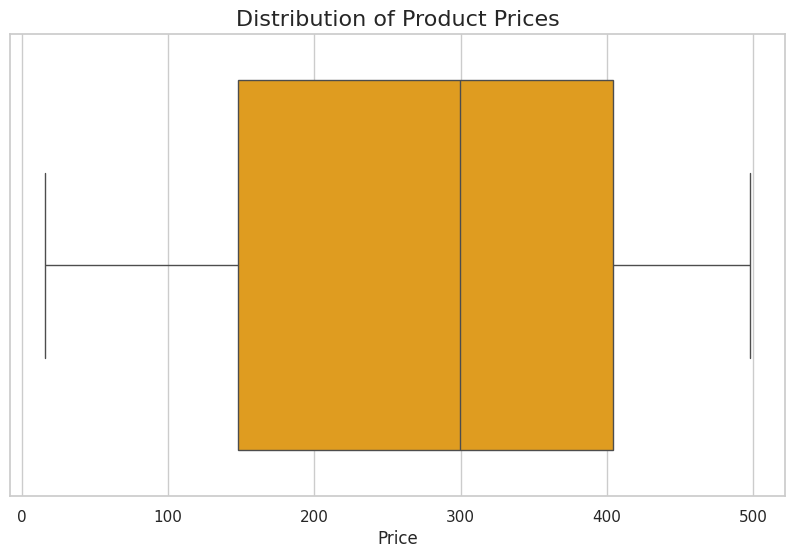

In [65]:
# Boxplot for Price distribution
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_trans, x='Price', color='orange')
plt.title('Distribution of Product Prices', fontsize=16)
plt.xlabel('Price', fontsize=12)
plt.show()